# Convolutional Neural Network

In [ ]:
# ! pip install kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download -d tongpython/cat-and-dog
# ! unzip dataset.zip
# ! rm kaggle.json

In [ ]:
# ! cp -r /content/drive/MyDrive/Code/cats_and_dogs.zip /content/cats_and_dogs.zip
# ! unzip cats_and_dogs.zip

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# drive.flush_and_unmount()

### Importing the libraries

In [ ]:
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.8.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set | Image Augmentation

In [ ]:
train_data_generator = ImageDataGenerator(rescale = 1./255, 
                                          shear_range = 0.2, 
                                          zoom_range = 0.2, 
                                          horizontal_flip = True)

training_set = train_data_generator.flow_from_directory("dataset/training_set", 
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = "binary")

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_data_generator = ImageDataGenerator(rescale = 1./255)
test_set = test_data_generator.flow_from_directory("dataset/test_set",
                                                   target_size = (64, 64),
                                                   batch_size = 32,
                                                   class_mode = "binary")

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.Sequential([
    # First Convolutional Layer                      
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", input_shape = (64, 64, 3)),
    tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

    # Second Convolutional Layer
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),

    # Flattening
    tf.keras.layers.Flatten(),

    # Full Connection
    tf.keras.layers.Dense(units = 128, activation = "relu"),

    # Output Layer
    tf.keras.layers.Dense(units = 1, activation = "sigmoid")
])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = "adam", 
            loss = "binary_crossentropy",
            metrics = ['accuracy']
)
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 65s 254ms/step - loss: 0.6728 - accuracy: 0.5791 - val_loss: 0.6703 - val_accuracy: 0.6010
Epoch 2/25
250/250 [==============================] - 64s 255ms/step - loss: 0.5939 - accuracy: 0.6831 - val_loss: 0.5538 - val_accuracy: 0.7135
Epoch 3/25
250/250 [==============================] - 67s 267ms/step - loss: 0.5587 - accuracy: 0.7131 - val_loss: 0.5780 - val_accuracy: 0.7020
Epoch 4/25
250/250 [==============================] - 67s 269ms/step - loss: 0.5177 - accuracy: 0.7452 - val_loss: 0.5115 - val_accuracy: 0.7425
Epoch 5/25
250/250 [==============================] - 69s 276ms/step - loss: 0.4925 - accuracy: 0.7626 - val_loss: 0.5017 - val_accuracy: 0.7590
Epoch 6/25
250/250 [==============================] - 65s 259ms/step - loss: 0.4723 - accuracy: 0.7754 - val_loss: 0.5645 - val_accuracy: 0.7270
Epoch 7/25
250/250 [==============================] - 67s 266ms/step - loss: 0.4576 - accuracy: 0.7835 - val_loss: 0.4655 - val_ac

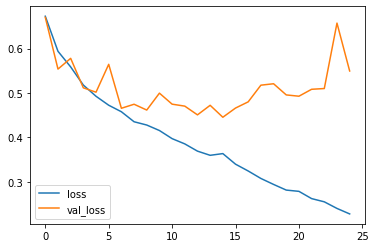

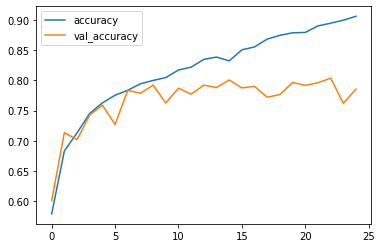

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

# Part 4 - Trying on VGG16

In [ ]:
vgg = tf.keras.applications.VGG16(weights = 'imagenet',
                                        include_top = False,
                                        input_shape = (64,64, 3))
vgg.trainable = False

vgg_model = tf.keras.Sequential([
        vgg,
        tf.keras.layers.Flatten(),

        # Full Connection
        tf.keras.layers.Dense(units = 512, activation = "relu"),
        tf.keras.layers.Dropout(0.2),

        # Output Layer
        tf.keras.layers.Dense(units = 1, activation = "sigmoid")
])
vgg_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 513       
                                                                 
Total params: 15,764,289
Trainable params: 1,049,601
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
vgg_model.compile(optimizer = tf.keras.optimizers.Adam(), 
            loss = "binary_crossentropy",
            metrics = ['accuracy']
)

# early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)

vgg_history = vgg_model.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
250/250 [==============================] - 395s 2s/step - loss: 0.5154 - accuracy: 0.7404 - val_loss: 0.4676 - val_accuracy: 0.7685
Epoch 2/15
250/250 [==============================] - 390s 2s/step - loss: 0.4612 - accuracy: 0.7794 - val_loss: 0.4294 - val_accuracy: 0.7955
Epoch 3/15
250/250 [==============================] - 389s 2s/step - loss: 0.4414 - accuracy: 0.7933 - val_loss: 0.4368 - val_accuracy: 0.7795
Epoch 4/15
250/250 [==============================] - 388s 2s/step - loss: 0.4273 - accuracy: 0.7974 - val_loss: 0.4594 - val_accuracy: 0.7870
Epoch 5/15
250/250 [==============================] - 390s 2s/step - loss: 0.4179 - accuracy: 0.8087 - val_loss: 0.4397 - val_accuracy: 0.7880
Epoch 6/15
250/250 [==============================] - 388s 2s/step - loss: 0.4092 - accuracy: 0.8095 - val_loss: 0.4213 - val_accuracy: 0.8070
Epoch 7/15
250/250 [==============================] - 387s 2s/step - loss: 0.4079 - accuracy: 0.8081 - val_loss: 0.4089 - val_accuracy: 0.8095

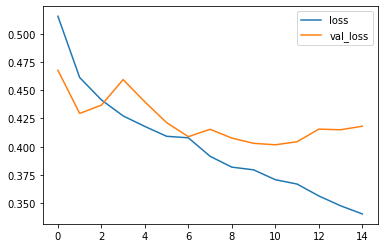

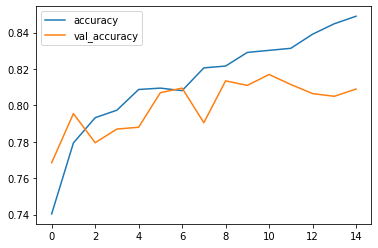

In [ ]:
vgg_history_frame = pd.DataFrame(vgg_history.history)
vgg_history_frame.loc[:, ['loss', 'val_loss']].plot()
vgg_history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

## Part 5 - Making a single prediction

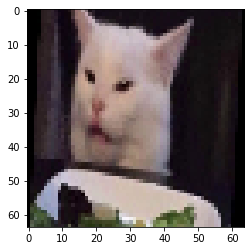

CNN: cat
VGG16: dog


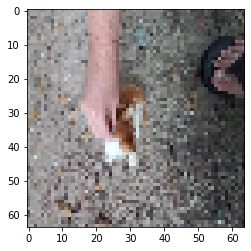

CNN: cat
VGG16: cat


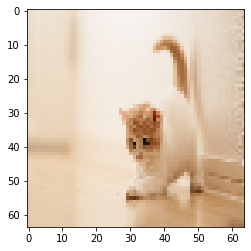

CNN: cat
VGG16: cat


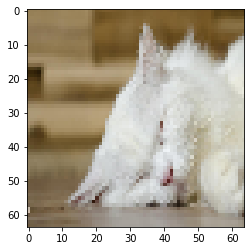

CNN: cat
VGG16: cat


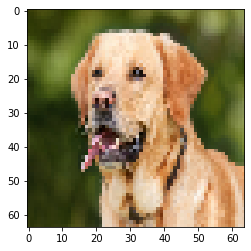

CNN: dog
VGG16: dog


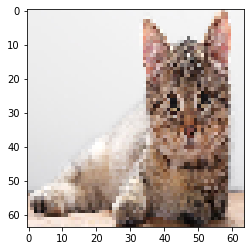

CNN: cat
VGG16: cat


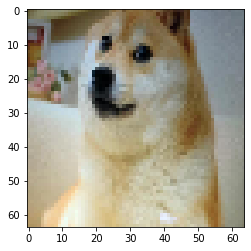

CNN: dog
VGG16: dog


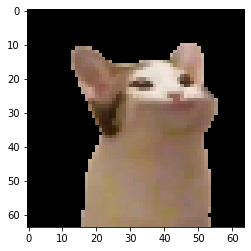

CNN: dog
VGG16: dog


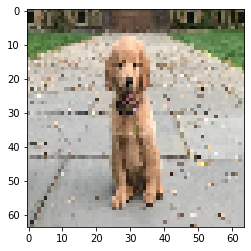

CNN: dog
VGG16: dog


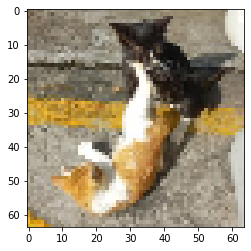

CNN: dog
VGG16: dog


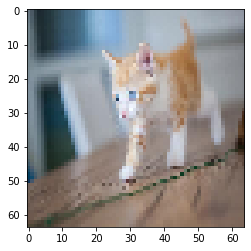

CNN: dog
VGG16: cat


In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from keras.preprocessing import image

# test_image = image.load_img("dataset/single_prediction/cat_or_dog_1.jpg", target_size = (64, 64))

for image_path in glob.glob("dataset/single_prediction/*"):
    test_image = image.load_img(image_path, target_size = (64, 64))
    plt.imshow(test_image)
    plt.show()

    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    cnn_result = cnn.predict(test_image)
    vgg_result = vgg_model.predict(test_image)

    # print(training_set.class_indices)
    if cnn_result[0][0] == 1:
        cnn_prediction = "dog"
    else:
        cnn_prediction = "cat"

    if vgg_result[0][0] == 1:
        vgg_prediction = "dog"
    else:
        vgg_prediction = "cat"

    print("CNN: " + cnn_prediction)
    print("VGG16: " + vgg_prediction)